In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from scipy import optimize

### Linear regression example: Movie success prediction
(M Mestyán, T Yasseri, J Kertész - PloS one, 2013)

* Variables:
  - [V] Number of views of the Wikipedia page
  - [U] Number of editors of the Wikipedia page
  - [E] Number of edits made on the Wikipedia page
  - [R] Collaborative rigor of Wikipedia editing
  - [T] <span style="color:red">Number of theaters that screen the movie</span>
* Time${=}0$ day of release
* Coefficient of determination
* Relative importance of parameters can be read
* Coefficients also proportional to parameter importance
<img src="movie.png" width="640">


#### Generate random points

In [2]:
x = np.random.random((100,2))

#### Function with noise

In [3]:
y = x[:,0]*7 - x[:,1]*3 + np.random.random() - 0.5

In [4]:
np.shape(x)

(100, 2)

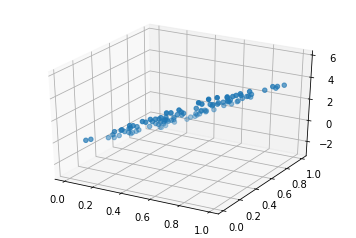

In [5]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(x[:,0], x[:,1], y, marker='o')
plt.show()

Linear model

$$y_i=w_0+w_1x_i+w_2x_i^2+\cdots+w_mx_i^m+\varepsilon_i$$

$$
\begin{pmatrix} y_1\cr y_2\cr \vdots\cr y_n \end{pmatrix} =
\begin{pmatrix}
1&x_1&x_1^2&\dots &x_1^m\cr
1&x_2&x_2^2&\dots &x_2^m\cr
\vdots&\vdots&\vdots&\ddots &\vdots\cr
1&x_n&x_n^2&\dots &x_n^m\cr
\end{pmatrix}
\begin{pmatrix} w_1\cr w_2\cr \vdots\cr w_n \end{pmatrix}
+
\begin{pmatrix} \varepsilon_1\cr \varepsilon_2\cr \vdots\cr
\varepsilon_n \end{pmatrix}
$$
Solve for $\mathbf{w}$:
$$\mathbf{w}=(X^TX)^{-1}X^T \mathbf{y}$$

#### Solve for w

In [6]:
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
print(w)

[ 6.69672472 -3.2942499 ]


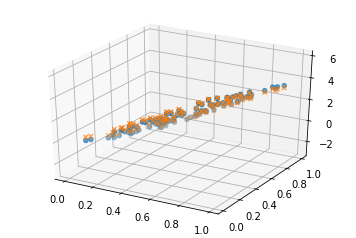

In [8]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(x[:,0], x[:,1], y, marker='o')
ax.scatter(x[:,0], x[:,1], x[:,0] * w[0] + x[:,1] * w[1], marker='x')
plt.show()

#### Internal linear regression

In [9]:
model = LinearRegression().fit(x, y)

In [10]:
print(model.score(x, y))
print('coeffs:', model.coef_)

1.0
coeffs: [ 7. -3.]


#### Why is it better?
Reason internal linear regression also assumes a constant term add a contant term to x

Implement it!

In [14]:
x2 = np.ones((100,3),dtype=float)
x2[:,0:2] = x

In [15]:
x2[0:5]

array([[0.51808796, 0.0949312 , 1.        ],
       [0.35553684, 0.92105767, 1.        ],
       [0.46015235, 0.85360399, 1.        ],
       [0.94419955, 0.49930156, 1.        ],
       [0.85290024, 0.56812763, 1.        ]])

In [17]:
w2 = np.dot(np.dot(np.linalg.inv(np.dot(x2.T,x2)),x2.T),y)
print(w2)

[ 7.         -3.         -0.35132516]


### Titanic data
Important columns (starting from 0)
 * 1: survived (1: yes, 0: no)
 * 2: passenger class
 * 4: gender
 * 5: age
The 1 in the last columnt is for the constant part of the linear regression

In [18]:
f = open("titanic.csv","r")
f.readline() # header
x = np.zeros((891,4), dtype=float)
y = np.zeros(891,dtype=float)
i = 0
for line in f:
    n = line.split(";")
    y[i] = float(n[1])
    if n[5].isdigit():
        age = float(n[5])
    else:
        age = -1
    x[i] = [float(n[2]), float(n[4]=="male"),age,1 ]
    i += 1
f.close()
print(x[:6])

[[ 3.  1. 22.  1.]
 [ 1.  0. 38.  1.]
 [ 3.  0. 26.  1.]
 [ 1.  0. 35.  1.]
 [ 3.  1. 35.  1.]
 [ 3.  1. -1.  1.]]


#### Exercise:
 * We have used -1 for unknown age. Replace it with the average age (averageof the known ones!)
 * Normalize the columns so that the coefficients can be compared

In [24]:
x[x[:,2]<0,2] = np.mean(x[x[:,2]>0,2])
print(x[:6])

[[ 3.          1.         22.          1.        ]
 [ 1.          0.         38.          1.        ]
 [ 3.          0.         26.          1.        ]
 [ 1.          0.         35.          1.        ]
 [ 3.          1.         35.          1.        ]
 [ 3.          1.         29.84760522  1.        ]]


In [27]:
for i in range(4):
    x[:,i] = x[:,i] / x[:,i].mean()
print(x[:6])

[[1.29946524 1.54419411 0.73707756 1.        ]
 [0.43315508 0.         1.27313397 1.        ]
 [1.29946524 0.         0.87109166 1.        ]
 [0.43315508 0.         1.17262339 1.        ]
 [1.29946524 1.54419411 1.17262339 1.        ]
 [1.29946524 1.54419411 1.         1.        ]]


In [28]:
print(x[0:3],"\n---\n",y[0:3])

[[1.29946524 1.54419411 0.73707756 1.        ]
 [0.43315508 0.         1.27313397 1.        ]
 [1.29946524 0.         0.87109166 1.        ]] 
---
 [0. 1. 1.]


In [29]:
print(x[:,0].mean(),x[:,1].mean(),x[:,2].mean())

1.0 0.9999999999999999 1.0


In [30]:
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
print(w)

[-0.41846227 -0.32522    -0.12738266  1.25490331]


In [31]:
model = LinearRegression().fit(x, y)

In [32]:
r_sq = model.score(x, y)
print(r_sq)

0.3782256964332879


In [33]:
print('coeffs:', model.coef_)

coeffs: [-0.41846227 -0.32522    -0.12738266  0.        ]


In [34]:
%timeit np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

The slowest run took 94.07 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 41.1 µs per loop


In [35]:
%timeit model = LinearRegression().fit(x, y)

The slowest run took 4.22 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 356 µs per loop


### Logistic regression
Just for curiosity. For binary data it works better than linear regression.

Binary output $Y$. Probability of $Y$ to happen is:
$$p(Y=1)=\frac{1}{1+\exp{\sum \beta_i x_i}} $$
<img src="lin_log_reg.png" width="200">

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x, y)
r_sq = model.score(x, y)
print(r_sq)
print('coeffs:', model.coef_)

0.7934904601571269
coeffs: [[-2.23690373 -1.61158248 -0.61643907  1.91532431]]
